# German traffic sign classification

### Aufgaben:
1. Schauen Sie sich das Notebook „data exploration.ipynb“ an, um eine Idee von dem „German Traffic Sign Recognition“-Datensatz zu bekommen.
2.	Trainieren Sie verschiedene Modelle mit unterschiedlichen Architekturen. Erstellen Sie mindestens drei unterschiedliche Modelle. Das Notebook „student_task.ipynb“ gibt eine grobe Struktur vor, wie Sie Ihre Modelle trainieren können.
3.	Vergleichen Sie die Modelle mithilfe einer Konfusionsmatrix und wählen Sie das beste Modell aus. Jedes Modell sollte mindestens eine Accuracy von 90 % auf dem Validierungsdatensatz erreichen. Begründen Sie Ihre Auswahl anhand der Konfusionsmatrix. Gehen Sie in Ihrer Analyse auf folgende Fragen ein:
    - „Welche Klassen werden besonders häufig verwechselt?“ 
    - „Zeigt ein Modell auffällige Schwächen bei bestimmten Verkehrszeichen?“
    - „Gibt es Klassen, die von allen Modellen zuverlässig erkannt werden?“ 
    - „Ist das Modell mit der höchsten Accuracy auch in der Konfusionsmatrix am überzeugendsten?“
4.	Testen sie das finale Modell und erstellen sie eine Konfusionsmatrix. Welche Unterschiede fallen Ihnen im Vergleich zu den Ergebnissen auf den Validierungsdaten auf?
5.	Erstellen Sie eine kurze Präsentation, die Ihre Ergebnisse vorstellt. Laden Sie die Präsentation, Ihren Code und Ihr finales Modell in der ILU-Gruppe hoch. 
6.	Bereiten sie sich auf einen Multiple Choice Test (MCT) zu diesem Praktikum vor. Sie müssen bei der Praktikumsabgabe keine Präsentation halten.



# Import libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

from keras.src.callbacks import EarlyStopping

2025-06-10 13:46:55.326496: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 13:46:55.400924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749556015.436641   43229 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749556015.447049   43229 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749556015.511752   43229 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [3]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [4]:
# Normalize image to [0, 1]
X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

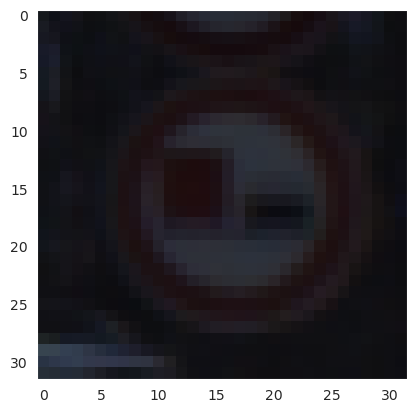

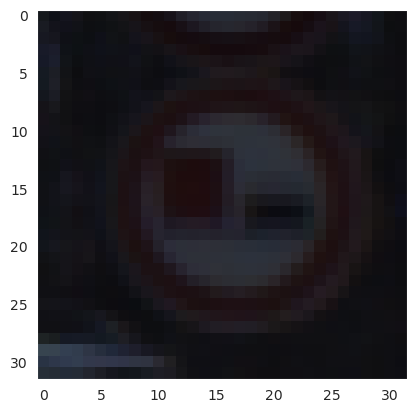

In [5]:
# Check that the images have been correctly converted and normalised
i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

# Create the Convolutional Neural Network with keras
For example a CNN that recognises handwritten numbers: [https://adamharley.com/nn_vis/cnn/2d.html](https://adamharley.com/nn_vis/cnn/2d.html)
Here a fully connected neural network that also recognise handwritten numbers: [https://adamharley.com/nn_vis/mlp/2d.html](https://adamharley.com/nn_vis/mlp/2d.html)

Use model.add() to add a [Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers) to your model. Here is a list of layers that might be useful:
- [Convolution Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): layers.Conv2D()
- [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D): layers.AveragePooling2D()
- [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): layers.MaxPool2D()
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): layers.Dropout()
- [Flattens](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the input. 2D -> 1D: layers.Flatten()
- [Densely-connected NN layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): layers.Dense()

In [6]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

# Only in the first layer you have to select the input_shape of the data (image).
model.add(layers.InputLayer(shape=(32,32,3 )))
model.add(layers.Conv2D( filters = 96, kernel_size = 3, padding = 'valid' , activation = 'relu'))


# model.add(layers.MaxPooling2D(( 2 , 2 ) ))
model.add(layers.Conv2D(filters=96,kernel_size=3,activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2 ))
model.add(layers.Conv2D(filters=192,kernel_size=3,activation='relu'))
model.add(layers.Conv2D(filters=192,kernel_size=3,activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43,'softmax'))

# Prints a summary of your network
model.summary()

I0000 00:00:1749556130.602370   43229 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6168 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,229,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,823,883 (6.96 MB)

 Trainable params: 1,823,883 (6.96 MB)

 Non-trainable params: 0 (0.00 B)

# Compile your model
When you want, you can change the [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) or the [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [16]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train your model
The documentation of the fit method: [https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [18]:

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 6,
    verbose = 1,
    restore_best_weights = True
)

history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid),
                    callbacks = [early_stop]
                    )

Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9983 - loss: 0.0094 - val_accuracy: 0.9846 - val_loss: 0.2142
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9988 - loss: 0.0106 - val_accuracy: 0.9848 - val_loss: 0.1305
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9825 - val_loss: 0.2310
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9855 - val_loss: 0.1872
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9980 - loss: 0.0099 - val_accuracy: 0.9864 - val_loss: 0.2320
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.9839 - val_loss: 0.2901
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9891 - val_loss: 0.1432
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accu

# Visualize Training

In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

Text(0.5, 1.0, 'Training and Validation loss')

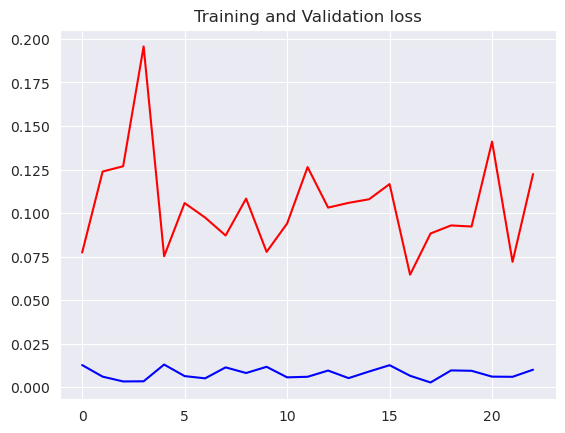

In [20]:
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

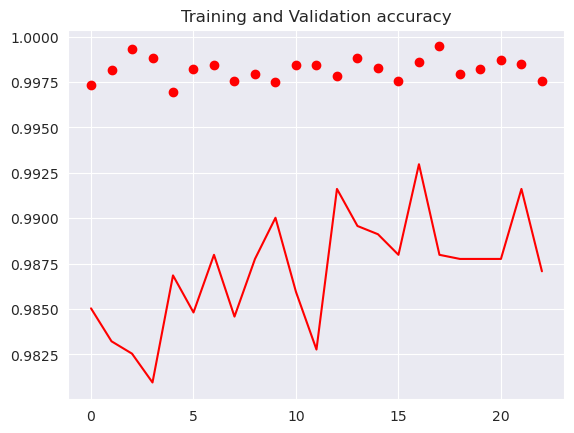

In [21]:
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

# Save your model
Create a folder for your models

In [22]:
model.save('saved_model/model99.3.h5')

# Load your model

In [19]:
model = tf.keras.models.load_model('saved_model/model99.3.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,229,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,823,885 (6.96 MB)

 Trainable params: 1,823,883 (6.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


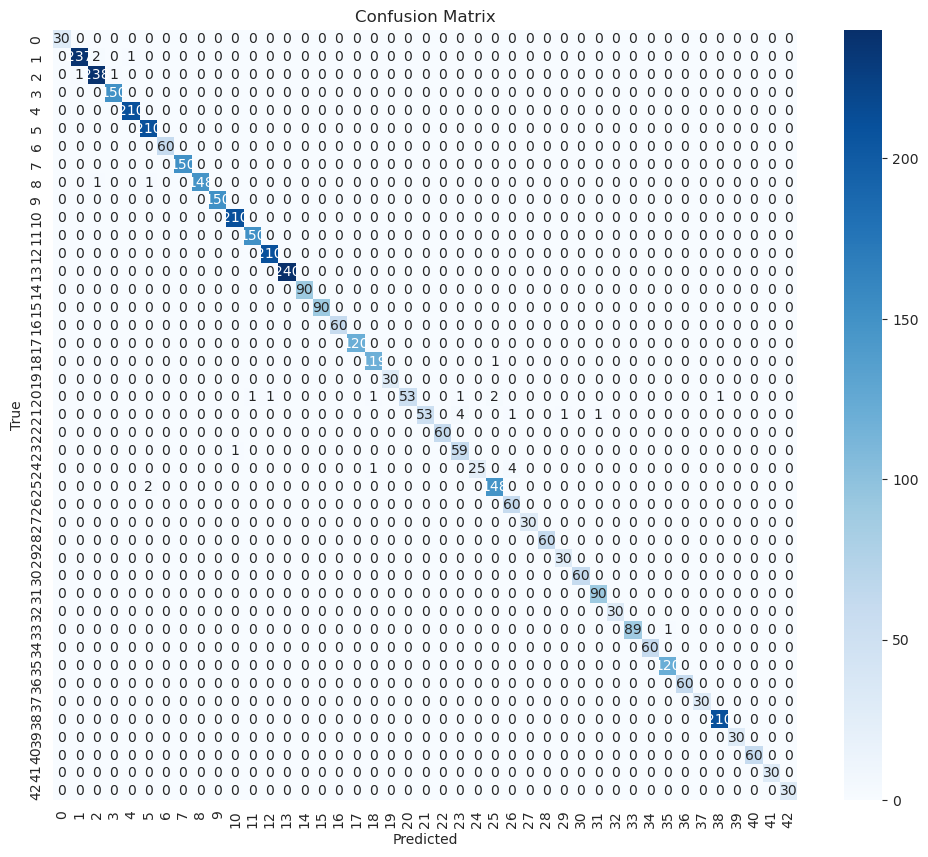

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_valid_norm), axis=-1)
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()